# Testiranje...

Importamo potrebne knjižnice.

In [61]:
import nltk
from urllib.request import urlopen
from bs4 import BeautifulSoup
from selenium import webdriver
import time


Spodaj je funkcija, ki prejme url in vrne sprasano telo novice.

In [114]:
def parse_url(url):
    try:
        driver = webdriver.Chrome('..\\webdriver\\chromedriver.exe')
        driver.get(url)
        button = driver.find_element_by_class_name('comment-show-hide')
        #webdriver.ActionChains(driver).move_to_element(button).click(button).perform()
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        button.click()
        time.sleep(1)
        html = driver.execute_script("return document.getElementsByTagName('html')[0].innerHTML")
        #html = driver.page_source
        #print(html)
        driver.close()
        
        soup = BeautifulSoup(html, 'html.parser')
        newsContents = soup.find_all("div", id="newsbody")[0].find_all("p")
        parsed = ""
        
        #print(html)
        
        comments = soup.find_all("div", class_="newscomments")[0].find_all("dt", class_="ds2")
        #print("QWE: " + comments.get_text())
        for p in newsContents: 
            parsed += p.get_text() + " "
        title = soup.find_all("h1")[0].get_text()
        parsed_comments = [c.get_text() for c in comments]
        return parsed, title, parsed_comments
    except:
        print("Error url: " + url)
        return "", "", ""

Test klica funkcije.

In [115]:
parse_url("http://www.rtvslo.si/svet/bliznji-vzhod/smrt-ameriki-iranci-protestirajo-proti-novim-sankcijam/470795")

('Več tisoč Irancev se je na obletnico zajetja ameriškega veleposlaništva in talcev med islamsko revolucijo leta 1979 zbralo na ulicah, kjer protestirajo tudi proti novim ameriškim sankcijam. Protestniki so v prestolnici Teheran pred prostori nekdanjega ameriškega veleposlaništva prepevali "smrt Ameriki" in sežigali ameriške zastave in fotografije predsednika Donalda Trumpa. "Iranski narod bo pokazal, da je gospod Trump premajhen, da bi spravil Iran na kolena," je po poročanju Associated Pressa na shodu dejal predsednik iranskega parlamenta Ali Laridžani. Proteste v organizaciji vlade neposredno prenašajo iranski državni mediji, ki poročajo, da se je v različnih krajih po Iranu zbralo več milijonov ljudi. Protestniki naj bi tudi prisegli zvestobo oblastem in vrhovnemu voditelju ajatoli Aliju Hameneju. Nasprotovanje sankcijam sovpada z obletnico islamske revolucije. 4. novembra 1979, kmalu po odstavitvi iranskega šaha Mohameda Reze Pahlavija, ki je užival podporo ZDA, so iranski študent

Naredimo še funkcijo, ki s pomočjo Rtvslo iskalnika vrne vse povezave do najdenih novic.

In [110]:
def get_urls(query, num_of_pages=1):
    urls = []
    for i in range(num_of_pages):
        html = urlopen("http://www.rtvslo.si/iskalnik?q=" + query + "&page=" + str(i)).read() 
        soup = BeautifulSoup(html, 'html.parser')
        for news in soup.find_all("div", class_="stitle"):
            urls.append("http://www.rtvslo.si" + news.a["href"])
    return urls

In [111]:
get_urls("trump", 2)

['http://www.rtvslo.si/svet/s-in-j-amerika/trump-volilni-dan-je-bil-izjemen-republikanci-kljubujejo-zgodovini/471120',
 'http://www.rtvslo.si/radio-si/second-hand-7-10-11-rolling-stone-the-100-greatest-songs-of-the-century-so-far-sample-check-11-20/471111',
 'http://www.rtvslo.si/zabava/zanimivosti/v-nevadi-na-volitvah-zmagal-ze-pokojni-kralj-bordelov/471088',
 'http://www.rtvslo.si/zabava/druzabna-kronika/miro-cerar-bo-v-tretje-postal-ocka/471042',
 'http://www.rtvslo.si/zabava/iz-sveta-znanih/sinead-o-connor-nikdar-vec-se-nocem-druziti-z-belci/471033',
 'http://www.rtvslo.si/capodistria/radio-capodistria/notizie/mondo/trump-non-si-fa-spazzare-via-dall-ondata-blu/471023',
 'http://www.rtvslo.si/gospodarstvo/borzni-komentar/za-wall-street-trump-najbolj-hvalezen-predsednik-v-64-letih/470949',
 'http://www.rtvslo.si/svet/s-in-j-amerika/demokratom-vecina-v-predstavniskem-domu-vec-prelomnih-izvolitev/471017',
 'http://www.rtvslo.si/svet/drzavljanstvo-naj-bo-glavno-merilo-rod-starsev-ali-dr

Definiramo seznam novic, ki bi jih radi sparsali.

Za vsako novico kličemo prvo metodo.

In [116]:
#urls = ["http://www.rtvslo.si/svet/s-in-j-amerika/trump-bi-prebeznikom-preprecil-vstop-v-zda-kar-z-izvrsnim-ukazom/470009",
#       "http://www.rtvslo.si/svet/s-in-j-amerika/trump-po-bombnih-posiljkah-poudarja-medijsko-sovraznost-paket-tudi-de-niru-in-bidnu/469952",
#       "http://www.rtvslo.si/svet/s-in-j-amerika/trump-govori-o-invaziji-na-zda-in-na-mejo-posilja-5-200-vojakov/470369",
#       "http://www.rtvslo.si/svet/s-in-j-amerika/trump-kljub-nasprotovanju-obiskal-prizorisce-strelskega-napada-v-pittsburghu/470503",
#       "http://www.rtvslo.si/svet/s-in-j-amerika/fbi-v-povezavi-z-bombnimi-posiljkami-trumpovim-kritikom-aretiral-osumljenca/470029"]
urls = get_urls("trump", 1)
parsed_news = []
for url in urls:
    parsed, title, comments = parse_url(url)
    if parsed != "":
        parsed_news.append((title, parsed, comments))
parsed_news

Error url: http://www.rtvslo.si/radio-si/second-hand-7-10-11-rolling-stone-the-100-greatest-songs-of-the-century-so-far-sample-check-11-20/471111
Error url: http://www.rtvslo.si/capodistria/radio-capodistria/notizie/mondo/trump-non-si-fa-spazzare-via-dall-ondata-blu/471023
Error url: http://www.rtvslo.si/capodistria/radio-capodistria/notizie/mondo/trump-alla-prova-del-voto-di-meta-mandato/470915


[('Trump: Volilni dan je bil izjemen. Republikanci kljubujejo zgodovini.',
  '"Velik in neverjeten dan je bil včeraj. Republikanska stranka je s povečanjem sedežev v senatu kljubovala zgodovini. Tudi v predstavniškem domu se je odrezala bolj od pričakovanj," je izide vmesnih volitev v kongres komentiral predsednik ZDA Donald Trump.  Republikanci so na torkovih volitvah izgubili večino v 435-članskem predstavniškem domu, kjer so demokrati že osvojili najmanj 222 sedežev (za večino potrebnih 218), po zadnjih projekcijah jim kaže 229, na drugi strani pa je republikanska stranka okrepila večino v senatu, kjer bo imela več kot potrebnih 51 glasov večine, najbrž 53 ali 54. Pridobitve pretehtajo nad izgubami Trump je na novinarski konferenci v Beli hiši ocenil, da so pridobitve v senatu pretehtale nad izgubami v predstavniškem domu, saj se običajno ne zgodi, da bi stranka aktualnega predsednika na prvih vmesnih volitvah v mandatu pridobila podporo. To je nazadnje uspelo  Johnu F. Kennedyju le

Klic programa za lematizacijo.

0: uspešno

1: neuspešno

In [118]:
import os
f = open("../ObeliksLatest/input.txt", "w", encoding="utf-8")
for news in parsed_news:
    f.write(news[1] + "\n\n")
f.close()
os.chdir("../ObeliksLatest")
#system("mkdir juhu")
os.system("PosTaggerTag -lem:LemmatizerModel.bin -v -o -t input.txt TaggerModel.bin out.xml")

0

Branje lematiziranih besed.

In [120]:
f  = open("../ObeliksLatest/out.xml", "r", encoding="utf-8").read()
soup = BeautifulSoup(f, "lxml")
lemmatized = []
lemmas = soup.find_all("p")
for i in range(0, len(lemmas), 1):
    lem = []
    for l in lemmas[i].find_all("w"):
        lem.append(l["lemma"])
    lemmatized.append(lem)
print(lemmatized)

[['velik', 'in', 'neverjeten', 'dan', 'biti', 'biti', 'včeraj', 'republikanski', 'stranka', 'biti', 'z', 'povečanje', 'sedež', 'v', 'senat', 'kljubovati', 'zgodovina', 'tudi', 'v', 'predstavniški', 'dom', 'se', 'biti', 'odrezati', 'bolj', 'od', 'pričakovanje', 'biti', 'izid', 'vmesen', 'volitev', 'v', 'kongres', 'komentirati', 'predsednik', 'ZDA', 'Donald', 'Trump', 'republikanec', 'biti', 'na', 'torkov', 'volitev', 'izgubiti', 'večina', 'v', '435', 'članski', 'predstavniški', 'dom', 'kjer', 'biti', 'demokrat', 'že', 'osvojiti', 'najmanj', '222', 'sedež', 'za', 'večina', 'potreben', '218', 'po', 'zadnji', 'projekcija', 'on', 'kazati', '229', 'na', 'drug', 'stran', 'pa', 'biti', 'republikanski', 'stranka', 'okrepiti', 'večina', 'v', 'senat', 'kjer', 'biti', 'imeti', 'več', 'kot', 'potreben', '51', 'glas', 'večina', 'najbrž', '53', 'ali', '54', 'pridobitev', 'pretehtati', 'nad', 'izguba', 'Trump', 'biti', 'na', 'novinarski', 'konferenca', 'v', 'bel', 'hiša', 'oceniti', 'da', 'biti', 'pri

In [121]:
import re
def tokenize(text):
    # First tokenize by sentence, then by word to ensure that punctuation is caught as it's own token.
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # Filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation).
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [122]:
text = "Janez si umiva zobe. Potem pa bo šel gledat risanke. Mislim, da je na sporedu čarobni Bakugan iz vesolja."
tokenize(text)

['janez',
 'si',
 'umiva',
 'zobe',
 'potem',
 'pa',
 'bo',
 'šel',
 'gledat',
 'risanke',
 'mislim',
 'da',
 'je',
 'na',
 'sporedu',
 'čarobni',
 'bakugan',
 'iz',
 'vesolja']

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(
                        max_df=0.8, 
                        max_features=200000,
                        min_df=0.2, 
                        stop_words='english', 
                        use_idf=True, 
                        tokenizer=tokenize, 
                        ngram_range=(1,3))

# Fit the vectorizer to synopses texts
#news_text = [text for _,text in parsed_news]
news_text = []
news_titles = [title for title,_ in parsed_news]
#news_titles = ['http://www.rtvslo.si/zabava/glasba/rihanna-ostro-proti-temu-da-trump-predvaja-njene-pesmi/471005',
 #'http://www.rtvslo.si/svet/macron-zeli-evropsko-vojsko-za-obrambo-pred-rusijo-in-zda/470998',
 #'http://www.rtvslo.si/svet/s-in-j-amerika/predsednika-hondurasa-in-gvatemale-zelita-ustaviti-prebeznike/470938',
 #'http://www.rtvslo.si/capodistria/radio-capodistria/notizie/mondo/trump-alla-prova-del-voto-di-meta-mandato/470915',
 #'http://www.rtvslo.si/svet/s-in-j-amerika/trump-mediji-iz-teh-volitev-delajo-referendum-o-meni/470914',
 #'http://www.rtvslo.si/kolumne/ce-z-vajeti-spustis-podivjane-pse-bodo-na-koncu-pogrizeni-vsi/470883',
 #'http://www.rtvslo.si/svet/bliznji-vzhod/hasokdzijeva-sinova-zahtevata-vrnitev-ocetovega-trupla/470861',
 #'http://www.rtvslo.si/svet/bliznji-vzhod/iran-se-ne-bo-uklonil-zda-ponosno-bomo-krsili-sankcije/470821',
 #'http://www.rtvslo.si/svet/s-in-j-amerika/prve-skupine-migrantov-iz-srednje-amerike-prispele-v-ciudad-de-mexico/470811',
 #'http://www.rtvslo.si/capodistria/radio-capodistria/notizie/mondo/scattano-le-nuove-sanzioni-di-trump-contro-l-iran/470809',
 #'http://www.rtvslo.si/svet/bliznji-vzhod/smrt-ameriki-iranci-protestirajo-proti-novim-sankcijam/470795',
 #'http://www.rtvslo.si/svet/s-in-j-amerika/napovedi-konec-prevlade-republikancev-v-kongresu-demokratom-vecina-v-predstavniskem-domu/470594',
 #'http://www.rtvslo.si/gospodarstvo/borzni-komentar/applova-trzna-vrednost-zdrsnila-pod-bilijon-dolarjev/470677',
 #'http://www.rtvslo.si/zabava/iz-sveta-znanih/hugh-jackman-utisal-obozevalce-ki-kritizirajo-njegovo-prijateljstvo-z-ivanko-trump/470740',
 #'http://www.rtvslo.si/radio-si/coming-up/highlights-of-the-week-3-nov-2018/470671',
 #'http://www.rtvslo.si/svet/bliznji-vzhod/v-iranu-stekla-proizvodnja-stoodstotno-domacih-vojaskih-letal/470717',
 #'http://www.rtvslo.si/zabava/iz-sveta-znanih/alec-baldwin-klofnil-mozakarja-ki-mu-je-ukradel-parkirni-prostor/470711',
 #'http://www.rtvslo.si/svet/bliznji-vzhod/erdogan-ukaz-za-umor-hasokdzija-je-prisel-z-vrha-savdske-vlade/470691',
 #'http://www.rtvslo.si/svet/s-in-j-amerika/zda-bodo-iz-sankcij-na-nakup-iranske-nafte-izvzele-osem-drzav/470688',
 #'http://www.rtvslo.si/svet/s-in-j-amerika/brazilija-bo-veleposlanistvo-iz-tel-aviva-preselila-v-jeruzalem/470617',
 #'http://www.rtvslo.si/svet/s-in-j-amerika/trump-grozi-s-streljanjem-na-prebeznike-in-govori-o-sotorskih-mestih/470603',
 #'http://www.rtvslo.si/svet/azija-z-oceanijo/zda-znova-nad-kitajsko-tokrat-zaradi-kraje-intelektualne-lastnine/470548',
 #'http://www.rtvslo.si/zabava/zanimivosti/foto-melania-spremenila-belo-hiso-v-hiso-duhov/470545',
 #'http://www.rtvslo.si/svet/v-zaporu-ubili-razvpitega-gangsterja-jamesa-bulgerja/470505',
 #'http://www.rtvslo.si/svet/s-in-j-amerika/trump-kljub-nasprotovanju-obiskal-prizorisce-strelskega-napada-v-pittsburghu/470503',
 #'http://www.rtvslo.si/zabava/iz-sveta-znanih/kanye-se-z-besedami-izkoristili-so-me-distancira-od-politike/470478',
 #'http://www.rtvslo.si/svet/bliznji-vzhod/nacelni-pragmatizem-eu-ja-v-senci-milijardnih-orozarskih-poslov-s-savdsko-arabijo/470456',
 #'http://www.rtvslo.si/svet/s-in-j-amerika/trump-govori-o-invaziji-na-zda-in-na-mejo-posilja-5-200-vojakov/470369',
 #'http://www.rtvslo.si/na-danasnji-dan/30-oktober-dan-ko-so-americane-prestrasili-wellsovi-marsovci/140187']
for news in lemmatized:
    news_text.append(" ".join([str(x) for x in news]))
print(news_text)
%time tfidf_matrix = tfidf_vectorizer.fit_transform(news_text) 

print("TF-IDF matrix shape: {}".format(tfidf_matrix.shape))
print(tfidf_matrix)

['velik in neverjeten dan biti biti včeraj republikanski stranka biti z povečanje sedež v senat kljubovati zgodovina tudi v predstavniški dom se biti odrezati bolj od pričakovanje biti izid vmesen volitev v kongres komentirati predsednik ZDA Donald Trump republikanec biti na torkov volitev izgubiti večina v 435 članski predstavniški dom kjer biti demokrat že osvojiti najmanj 222 sedež za večina potreben 218 po zadnji projekcija on kazati 229 na drug stran pa biti republikanski stranka okrepiti večina v senat kjer biti imeti več kot potreben 51 glas večina najbrž 53 ali 54 pridobitev pretehtati nad izguba Trump biti na novinarski konferenca v bel hiša oceniti da biti pridobitev v senat pretehtati nad izguba v predstavniški dom saj se običajno ne zgoditi da biti stranka aktualen predsednik na prvi vmesen volitev v mandat pridobiti podpora ta biti nazadnje uspeti John F. Kennedy leto 1962 skupaj lahko narediti velik stvar razdeljen 116. kongres ki se biti na ustanoven zasedanje zbrati 3. 

In [124]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
dist

array([[-4.44089210e-16,  6.58896233e-01,  8.60034246e-01,
         8.39942105e-01,  7.24877118e-01,  3.99473699e-01,
         7.57766453e-01,  8.28205216e-01,  8.49207328e-01,
         8.68639528e-01,  4.30948043e-01,  7.96895837e-01],
       [ 6.58896233e-01,  0.00000000e+00,  6.99172376e-01,
         8.04288976e-01,  7.26555529e-01,  4.87588189e-01,
         6.48068217e-01,  7.40660738e-01,  8.26991118e-01,
         7.97994303e-01,  5.62189366e-01,  7.75088393e-01],
       [ 8.60034246e-01,  6.99172376e-01, -2.22044605e-16,
         8.74413606e-01,  7.39194292e-01,  8.01015715e-01,
         7.81255508e-01,  8.59943296e-01,  8.80202628e-01,
         8.01238987e-01,  9.00170017e-01,  7.50690612e-01],
       [ 8.39942105e-01,  8.04288976e-01,  8.74413606e-01,
         0.00000000e+00,  7.31165347e-01,  8.75500918e-01,
         5.88427539e-01,  6.59352564e-01,  8.33991396e-01,
         8.10922395e-01,  8.70469315e-01,  7.50291780e-01],
       [ 7.24877118e-01,  7.26555529e-01,  7.3919429

In [125]:
from sklearn.cluster import KMeans

num_clusters = 5
km = KMeans(n_clusters=num_clusters)

# Perform clustering
%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()
print("Clusters: {}".format(clusters))

Wall time: 370 ms
Clusters: [1, 1, 4, 0, 2, 1, 2, 0, 3, 3, 1, 2]


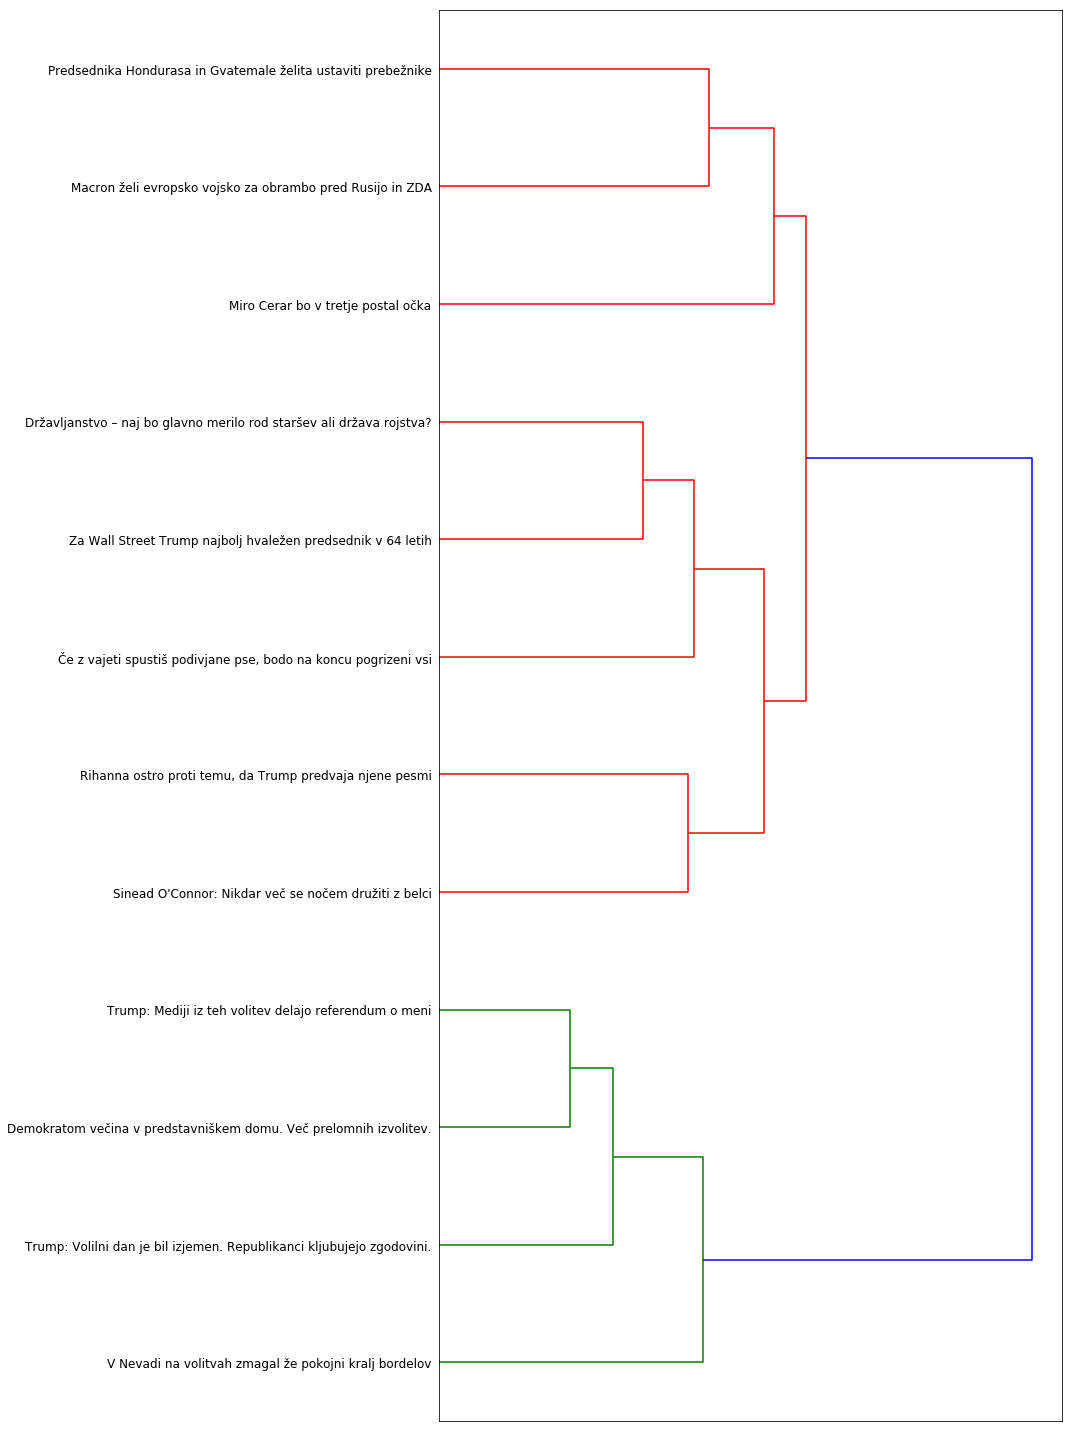

In [127]:
from scipy.cluster.hierarchy import ward, dendrogram
import matplotlib.pyplot as plt

# Define the linkage_matrix using ward clustering pre-computed distances.
linkage_matrix = ward(dist) 

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=news_titles);

plt.tick_params(\
    axis= 'x',         # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

# Uncomment the below to show or save the plot.
plt.show()
#plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters
plt.close()